# Regularization

* Constraining a model to have fewer degrees of freedom in order to prevent overfitting

## Ridge Regression
* Regularized version of Linear Regression
* More information on page 46 and 49 of notebook

In [1]:
import numpy as np
m =20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [4]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0, solver="cholesky")
ridge_reg.fit(X_poly,y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.247063e-19
  overwrite_a=True).T


Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [5]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new) ## contains X_new[i] and X_new[i]**2
y_new = ridge_reg.predict(X_new_poly)

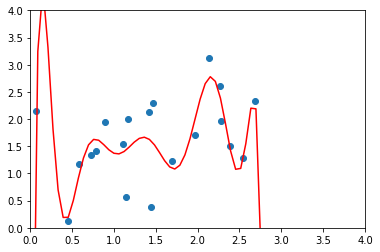

In [6]:
plt.axis([0,4,0,4])
plt.plot(X_new,y_new,'r-')
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [8]:
y_new = ridge_reg.predict(X_new_poly)

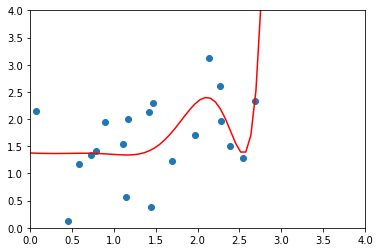

In [9]:
plt.axis([0,4,0,4])
plt.plot(X_new,y_new,'r-')
plt.scatter(X,y)

* We can see that when we have an overfitted model (Polynomial Regression degree 10) and apply no Ridge Penalty (alpha = 0), the model is very sensitive to the training data
* Once we apply a Ridge Penalty (alpha = 1), the model actually generalizes properly, which will most likely perform better on testing

### Ridge Regression Using Stochastic Gradient Descent

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2') ## l2 means adding regularization term to cost function equal to normal of the weight vector AKA Ridge Regression
sgd_reg.fit(X,y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [11]:
y_new = sgd_reg.predict(X_new)

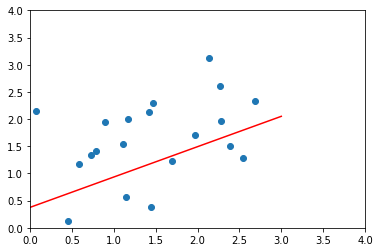

In [12]:
plt.axis([0,4,0,4])
plt.plot(X_new,y_new,'r-')
plt.scatter(X,y)

## Lasso Regression
* More information on page 50 of notebook

In [13]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly,y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
y_new = lasso_reg.predict(X_new_poly)

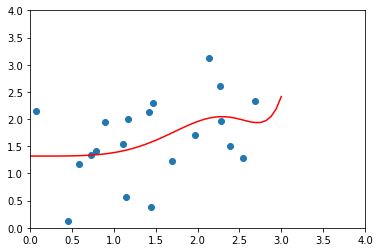

In [15]:
plt.axis([0,4,0,4])
plt.plot(X_new,y_new,'r-')
plt.scatter(X,y)

## Elastic Net 
* More information on page 51 of notebook

In [33]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly,y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
y_new = elastic_net.predict(X_new_poly)

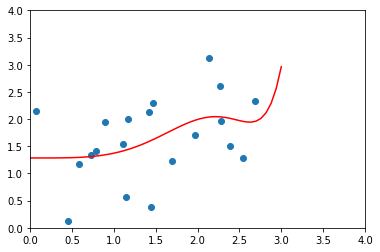

In [31]:
plt.axis([0,4,0,4])
plt.plot(X_new,y_new,'r-')
plt.scatter(X,y)

## Early Stopping
* Early Stopping is a regularization method of stopping training as soon as the validation error reaches a minimum
* More information can be found on 51 of notebook

In [43]:
## Simple example of Early Stopping
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures (degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [44]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

In [45]:
sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,learning_rate='constant',eta0=0.0005)

In [46]:
minimum_val_error = float('inf')
best_epoch = None
best_model = None

In [47]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train) ## Continues where training left off using warm_start=True
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)